In [2]:
import pandas as pd
import numpy as np

In [3]:
diabetes = pd.read_csv('data/diabetes_data.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Gender
0,6,98,58,33,190,34.0,0.430,43,0,Female
1,2,112,75,32,0,35.7,0.148,21,0,Female
2,2,108,64,0,0,30.8,0.158,21,0,Female
3,8,107,80,0,0,24.6,0.856,34,0,Female
4,7,136,90,0,0,29.9,0.210,50,0,Female


In [46]:
diabetes_dd = diabetes.copy()
diabetes_dd = diabetes_dd.drop_duplicates()
diabetes_dd.shape[0]

768

In [47]:
low_information_cols = []
for col in diabetes_dd.columns:
    #наибольшая относительная частота в признаке
    top_freq = diabetes_dd[col].value_counts(normalize=True).max()
    #доля уникальных значений от размера признака
    nunique_ratio = diabetes_dd[col].nunique() / diabetes_dd[col].count()
    # сравниваем наибольшую частоту с порогом
    if top_freq > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(top_freq*100, 2)}% одинаковых значений')
    # сравниваем долю уникальных значений с порогом
    if nunique_ratio > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(nunique_ratio*100, 2)}% уникальных значений')

Gender: 100.0% одинаковых значений


In [48]:
diabetes_dd = diabetes_dd.drop(low_information_cols, axis=1)

In [58]:
# поиск и замена нулей в столбце инсулин
diabetes_dd.loc[diabetes_dd['Insulin']==0,'Insulin'] = np.nan
#diabetes_dd['Insulin'].isnull().value_counts()/diabetes_dd['Insulin'].shape[0]
diabetes_dd.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,98,58,33,190.0,34.0,0.430,43,0
1,2,112,75,32,NaN,35.7,0.148,21,0
2,2,108,64,0,NaN,30.8,0.158,21,0
3,8,107,80,0,NaN,24.6,0.856,34,0
4,7,136,90,0,NaN,29.9,0.210,50,0


In [59]:
# поиск и замена нулей в остальных столбцах
find_nan = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI']
for col in find_nan:
    diabetes_dd.loc[diabetes_dd[col]==0, col] = np.nan

In [60]:
diabetes_dd['BloodPressure'].isnull().value_counts()

BloodPressure
False    733
True      35
Name: count, dtype: int64

In [62]:
cols_null_percent = diabetes_dd.isnull().mean() * 100
cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)
display(cols_with_null)

Insulin          48.697917
SkinThickness    29.557292
BloodPressure     4.557292
BMI               1.432292
Glucose           0.651042
dtype: float64

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

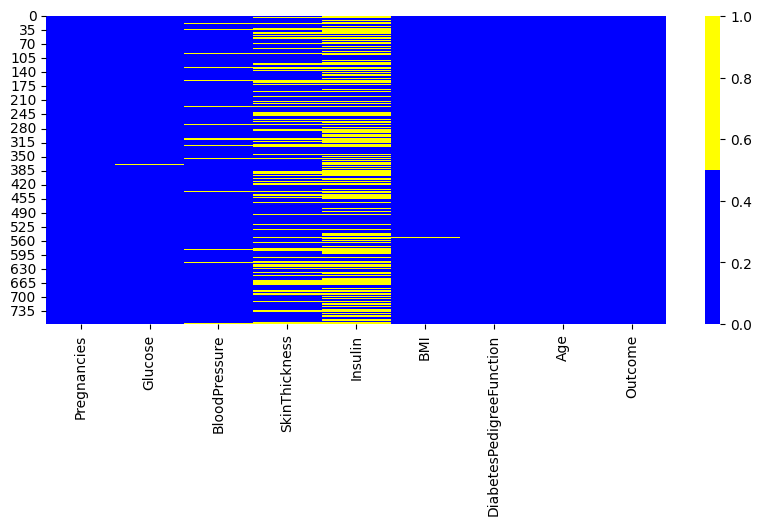

In [61]:
colors = ['blue', 'yellow'] 
fig = plt.figure(figsize=(10, 4))
cols = cols_with_null.index
ax = sns.heatmap(
    diabetes_dd[cols].isnull(),
    cmap=sns.color_palette(colors),
)

In [ ]:
diabetes_dd = diabetes_dd.drop('Insulin', axis=1)


In [66]:
diabetes_dd.shape

(768, 8)

In [69]:
diabetes_dd = diabetes_dd.dropna(thresh=6, axis=0)
diabetes_dd.shape

(761, 8)

In [70]:
diabetes_dd = diabetes_dd.fillna(diabetes_dd.mean())
diabetes_dd['SkinThickness'].mean()

29.153419593345657

In [71]:
def outliers_iqr(data, feature, left=1.5, right=1.5):
    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

outliers, cleaned = outliers_iqr(diabetes_dd, 'SkinThickness')
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу Тьюки: 87
Результирующее число записей: 674


In [82]:
# метод тьюки / метод межквартильного размаха
def outliers_iqr_mod(data, feature, left=1.5, right=1.5, log_scale=False):
    if log_scale:
        x = np.log(data[feature])
    else:
        x= data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned


outliers, _ = outliers_z_score(diabetes_dd, 'DiabetesPedigreeFunction')
outliers_log, _ = outliers_z_score(diabetes_dd, 'DiabetesPedigreeFunction', log_scale=True)
print(outliers.shape[0] - outliers_log.shape[0])

-46
